# Exploring pyrtlsdr

Examples from https://github.com/roger-/pyrtlsdr

In [5]:
from rtlsdr import RtlSdr

sdr = RtlSdr()

# configure device
sdr.sample_rate = 2.048e6  # Hz
sdr.center_freq = 70e6     # Hz
sdr.freq_correction = 60   # PPM
sdr.gain = 'auto'

print(sdr.read_samples(512))

sdr.close()

[-0.01960784-0.00392157j -0.00392157-0.01176471j  0.00392157-0.00392157j
 -0.00392157+0.00392157j  0.00392157-0.00392157j  0.00392157+0.00392157j
 -0.00392157-0.00392157j -0.00392157+0.00392157j -0.01176471+0.01960784j
 -0.00392157-0.01176471j  0.00392157-0.00392157j  0.00392157+0.01176471j
  0.00392157+0.00392157j  0.01176471-0.04313725j  0.00392157-0.01960784j
  0.01176471-0.01176471j  0.01176471-0.01960784j  0.00392157+0.00392157j
 -0.00392157-0.00392157j -0.01176471-0.00392157j -0.00392157+0.00392157j
 -0.00392157+0.00392157j -0.00392157+0.00392157j -0.00392157+0.01960784j
 -0.00392157-0.00392157j -0.00392157-0.00392157j  0.00392157-0.00392157j
  0.00392157-0.01176471j -0.00392157+0.00392157j -0.00392157-0.00392157j
 -0.00392157+0.00392157j  0.01960784-0.00392157j  0.00392157-0.00392157j
 -0.00392157+0.00392157j -0.00392157-0.00392157j  0.00392157-0.00392157j
  0.01176471-0.00392157j  0.00392157-0.00392157j  0.01960784-0.01960784j
 -0.00392157-0.00392157j -0.00392157-0.00392157j  0

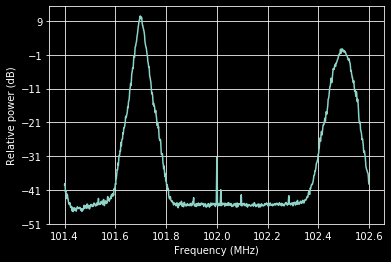

In [12]:
from pylab import *
from rtlsdr import *

sdr = RtlSdr()

# configure device
sdr.sample_rate = 1.2e6  # about half the max BW of most RTL dongles
sdr.center_freq = 102e6   # 95MHz, FM band
sdr.gain = 4

samples = sdr.read_samples(256*1024)
sdr.close()

# use matplotlib to estimate and plot the PSD
psd(samples, NFFT=1024, Fs=sdr.sample_rate/1e6, Fc=sdr.center_freq/1e6)
xlabel('Frequency (MHz)')
ylabel('Relative power (dB)')

show()